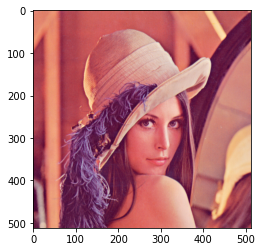

In [19]:
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import numpy as np

bias = 20

raw = cv2.imread("images/lena.png")
raw = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)
# raw = cv2.resize(raw, (256, 256))
raw = raw.astype(int)

plt.imshow(raw)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


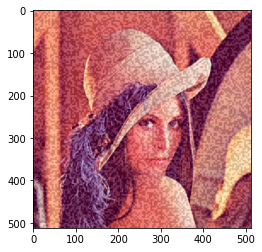

In [20]:
random = (np.random.random([128, 128]) >= 0.5) * 2 - 1
random = cv2.resize(random, [512, 512], interpolation=cv2.INTER_NEAREST)

random_biased = np.copy(raw)
random_biased[:, :, 0] += bias * random
random_biased[:, :, 1] += bias * random
random_biased[:, :, 2] += bias * random
plt.imshow(random_biased)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


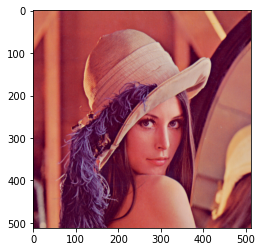

In [21]:
uniform_biased = np.copy(raw)
uniform_biased[:, :] -= bias
plt.imshow(uniform_biased)

In [22]:
raw_tensor = torch.from_numpy(raw) / 255
random_tensor = torch.from_numpy(random_biased) / 255
uniform_tensor = torch.from_numpy(uniform_biased) / 255

F.l1_loss(random_tensor, raw_tensor), F.l1_loss(uniform_tensor, raw_tensor)

(tensor(0.0784), tensor(0.0784))

In [23]:
from functools import partial

raw_tensor_p = torch.permute(raw_tensor, (2, 0, 1)).unsqueeze(0)
uniform_tensor_p = torch.permute(uniform_tensor, (2, 0, 1)).unsqueeze(0)
random_tensor_p = torch.permute(random_tensor, (2, 0, 1)).unsqueeze(0)

In [32]:
from pytorch_msssim import ms_ssim

(1 - ms_ssim(uniform_tensor_p, raw_tensor_p, data_range=1)), \
(1 - ms_ssim(random_tensor_p, raw_tensor_p, data_range=1)), \
(1 - ms_ssim(raw_tensor_p, raw_tensor_p, data_range=1))

(tensor(0.0031), tensor(0.4017), tensor(0.))

In [26]:
random_biased = np.clip(random_biased, 0, 255)
uniform_biased = np.clip(uniform_biased, 0, 255)

cv2.imwrite("images/l1_vs_mse/lena_binary_noise.png", cv2.cvtColor(random_biased.astype(np.uint8), cv2.COLOR_BGR2RGB))
cv2.imwrite(
    "images/l1_vs_mse/lena_uniform_biased.png",
    cv2.cvtColor(uniform_biased.astype(np.uint8), cv2.COLOR_BGR2RGB)
)
cv2.imwrite("images/l1_vs_mse/lena_raw.png", cv2.cvtColor(raw.astype(np.uint8), cv2.COLOR_BGR2RGB))

True